In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
url= "https://www.seoul.go.kr/coronaV/coronaStatus.do"

In [ ]:
# read_html 은 사이트 내의 html 태그를 불러옵니다.
table = pd.read_html(url)

# table 변수 안에 있는 table 태그의 값을 하나씩 읽어보며 확진자 목록이 있는 테이블을 가져옵니다.
df=table[5]
df

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [ ]:
import requests
url= "https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw=1&columns[0][data]=0"
#url= f"{url}&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&order[0][column]=0&order[0][dir]=desc&start=0&length=100&search[value]=&search[regex]=true&_=1634131509151"
url = f"{url}&start=100&length=100&search%5Bvalue%5D=&search%5Bregex%5D=true&_=1634131509153"

response=requests.get(url)

In [ ]:
data_json=response.json()

In [ ]:
import time
from tqdm import trange

In [ ]:
def get_seoul_covid19_100001_currnet(page_no):
  ''' 
  page no: 입력값으로 페이지 번호를 입력하면 해당 번호의 데이터를 가져옴
  start no: 입력받은  page_no로
  '''
  start_no=(page_no-1)*100
  url= f"https://news.seoul.go.kr/api/27/getCorona19Status/get_status_ajax.php?draw{page_no}"
  #url= f"{url}&columns[0][name]=&columns[0][searchable]=true&columns[0][orderable]=true&columns[0][search][value]=&columns[0][search][regex]=false&columns[1][data]=1&columns[1][name]=&columns[1][searchable]=true&columns[1][orderable]=true&columns[1][search][value]=&columns[1][search][regex]=false&columns[2][data]=2&columns[2][name]=&columns[2][searchable]=true&columns[2][orderable]=true&columns[2][search][value]=&columns[2][search][regex]=false&columns[3][data]=3&columns[3][name]=&columns[3][searchable]=true&columns[3][orderable]=true&columns[3][search][value]=&columns[3][search][regex]=false&columns[4][data]=4&columns[4][name]=&columns[4][searchable]=true&columns[4][orderable]=true&columns[4][search][value]=&columns[4][search][regex]=false&columns[5][data]=5&columns[5][name]=&columns[5][searchable]=true&columns[5][orderable]=true&columns[5][search][value]=&columns[5][search][regex]=false&columns[6][data]=6&columns[6][name]=&columns[6][searchable]=true&columns[6][orderable]=true&columns[6][search][value]=&columns[6][search][regex]=false&order[0][column]=0&order[0][dir]=desc&start=0&length=100&search[value]=&search[regex]=true&_=1634131509151"
  url = f"{url}&order%5B0%5D%5Bdir%5D=desc&start={start_no}&length=100"
  
  response=requests.get(url)
  data_json = response.json()
  return data_json


In [ ]:
def get_multi_page_list_100001_currnet(start_page,end_page=80):

  page_list=[]
  for page_no in trange(start_page,end_page+1):
    one_page_data_json =get_seoul_covid19_100001_currnet(page_no)
    if len(one_page_data_json["data"])>0:
        one_page_df =pd.DataFrame(one_page_data_json["data"])
        page_list.append(one_page_df)
        time.sleep(0.5)
    else:
      return page_list
  
  return page_list



In [ ]:
start_page=1
end_page= 700

page_list= get_multi_page_list_100001_currnet(start_page, end_page) 
df_all_10001_current=pd.concat(page_list)

df_all_10001_current.columns = table[5].columns.tolist()
df_all_10001_current.head()

 93%|█████████▎| 650/700 [11:40<00:53,  1.08s/it]


,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,<p class='corona19_no'>134948</p>,402571,2021-11-16,송파구,-,감염경로 조사중,<b class=''>-</b>
1,<p class='corona19_no'>134947</p>,402570,2021-11-16,송파구,-,감염경로 조사중,<b class=''>-</b>
2,<p class='corona19_no'>134946</p>,402529,2021-11-16,성동구,-,기타 확진자 접촉,<b class=''>-</b>
3,<p class='corona19_no'>134945</p>,402402,2021-11-16,타시도,-,감염경로 조사중,<b class=''>-</b>
4,<p class='corona19_no'>134944</p>,402324,2021-11-16,타시도,-,감염경로 조사중,<b class=''>-</b>


In [ ]:
df_all=pd.concat(page_list)

In [ ]:
cols = df.columns.tolist()

In [ ]:
df_all.columns = cols

In [ ]:
import re
def extract_number(num_string):
  if type(num_string)==str:
    num_string=num_string.replace("corona19","")
    num=re.sub("[^0-9]","",num_string)
    num=int(num)
    return num
  else:
    return num_string

In [ ]:
num_string ="<p class='corona19_no'>109940</p>"

In [ ]:
df_all["연번"]=df_all["연번"].map(extract_number)

In [ ]:
def extract_hangeul(origin_text):
  subtract_text=re.sub("[^가-힣]","",origin_text)
  return subtract_text

In [ ]:
extract_hangeul("<b class='status1'>기타</b>")

'기타'

In [ ]:
extract_hangeul("<b class='status1'>퇴원</b>")

'퇴원'

In [ ]:
extract_hangeul("<b class=''></b>")

''

In [ ]:
df.all

<bound method DataFrame.all of Empty DataFrame
Columns: [연번, 환자, 확진일, 거주지, 여행력, 접촉력, 퇴원현황]
Index: []>

In [ ]:
df_all["퇴원현황"].value_counts()

<b class='status1'>퇴원</b>    44698
<b class='status1'>-</b>     14730
<b class=''>-</b>             4708
<b class='status2'>-</b>       510
<b class='status2'>사망</b>      302
Name: 퇴원현황, dtype: int64

In [ ]:
df_all.loc[df_all["퇴원현황"].str.contains("퇴원"),"퇴원현황"]="퇴원"
df_all.loc[df_all["퇴원현황"].str.contains("사망"),"퇴원현황"]="사망"
df_all.loc[~df_all["퇴원현황"].str.contains("퇴원|사망"),"퇴원현황"] = np.nan
df_all["퇴원현황"].value_counts()

퇴원    44698
사망      302
Name: 퇴원현황, dtype: int64

In [ ]:
df_all["퇴원현황"]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
     ... 
43     퇴원
44     퇴원
45     퇴원
46     퇴원
47     퇴원
Name: 퇴원현황, Length: 64948, dtype: object

In [ ]:
last_date = df_all.iloc[0]["확진일"]
last_date

'2021-11-16'

In [ ]:
#마지막 확진일을 파일명에 써주기 위해.을 _로 변경합니다.
#확장자와 구분이 쉽게 되도록 _로 변경합니다

date=last_date.replace(".","_")
date

'2021-11-16'

In [ ]:
#파일명을 만들어 줍니다.
#file_name

file_name = f"seoul-covid19-{date}.csv"
file_name

'seoul-covid19-2021-11-16.csv'

In [ ]:
#csv파일로 저장합니다.
df_all.to_csv(file_name,index=False)

In [ ]:
#제대로 저장되었는지 확인합니다.
df = pd.read_csv(file_name, encoding="utf-8")
df["확진일"] = pd.to_datetime(df["확진일"])

In [ ]:
# 월,주를 추출합니다.

df["월"] = df["확진일"].dt.month
df["주"] = df["확진일"].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
# 일자별 확진자수를 선그래프로 그립니다.
# 월일만 표기되도록 슬라이싱을 사용해 "월일" 컬럼을 만듭니다.
df["월일"] = df["확진일"].astype(str).map(lambda x : x[-5:])
day_count = df["월일"].value_counts().sort_index()

In [ ]:
#한글폰트 설정

def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

plt.rc("font", family=get_font_family())

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore') 

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)
fm._rebuild()

Selecting previously unselected package fonts-nanum-eco.
(Reading database ... 155237 files and directories currently installed.)
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


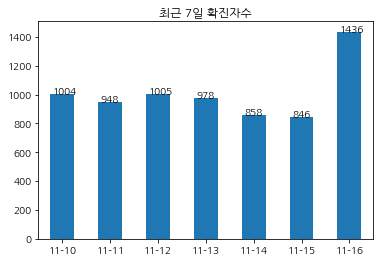

In [ ]:
# 슬라이싱을 통해 최근 7일 데이터만 그립니다.

g = day_count[-7:].plot.bar(rot=0, title = "최근 7일 확진자수")

for i in range(7):
    case_count = day_count[-7:].iloc[i]
    if case_count > 10:
        g.text(x=i-0.2, y=case_count, s=case_count)

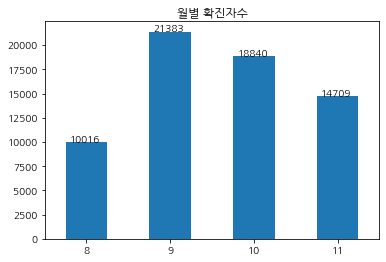

In [ ]:
# 월별 확진자수에 대한 빈도수를 구해서 시각화 합니다.

month_case = df["월"].value_counts().sort_index()
g = month_case.plot.bar(rot=0, title = "월별 확진자수")

for i in range(len(month_case)):
    g.text(x=i-0.2, y=month_case.iloc[i]+10, s=month_case.iloc[i])

서초구 소재 상가 관련               106
강동구 소재 병원 관련('21.11.)      149
중구 소재 시장 관련('21.9.)        295
종로구 소재 시장 관련               304
해외유입                       461
송파구 소재 시장 관련('21.9.)       755
병원 및 요양시설                  797
타시도 확진자 접촉                1101
감염경로 조사중                 26528
기타 확진자 접촉                27837
Name: 접촉력, dtype: int64

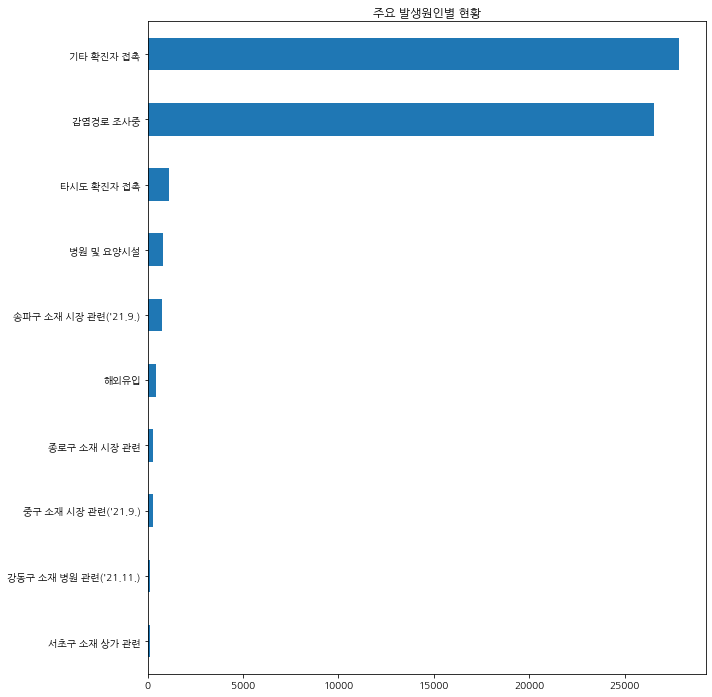

In [ ]:
# 접촉력 빈도수를 구합니다.
contact_count = df["접촉력"].value_counts()
contact_count_top = contact_count.sort_values().tail(10)

contact_count_top.plot.barh(figsize=(10, 12), title = "주요 발생원인별 현황")
contact_count_top